In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read and prepare the data
df = pd.read_csv('..\\solver_results.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
# Basic statistics for each solver
print("=== Summary Statistics by Solver Type ===")
summary_stats = df.groupby('solver_type').agg({
    'total_moves': ['mean', 'min', 'max', 'count'],
    'time': ['mean', 'min', 'max'],
    'finished': 'mean',
    'turns': ['mean', 'min', 'max']
}).round(2)
print(summary_stats)

=== Summary Statistics by Solver Type ===
            total_moves                    time              finished  \
                   mean min     max count  mean  min     max     mean   
solver_type                                                             
random         16731.02  23  123514    60  8.84  0.0  106.85     1.00   
spiral         11719.73   2   52787    60  4.35  0.0   30.42     1.00   
zigzag         15565.72   9   56930    60  7.71  0.0   53.65     0.95   

               turns             
                mean min    max  
solver_type                      
random       2217.52   2  16404  
spiral        185.67   2    460  
zigzag        123.90   0    454  


<Figure size 2000x1500 with 0 Axes>

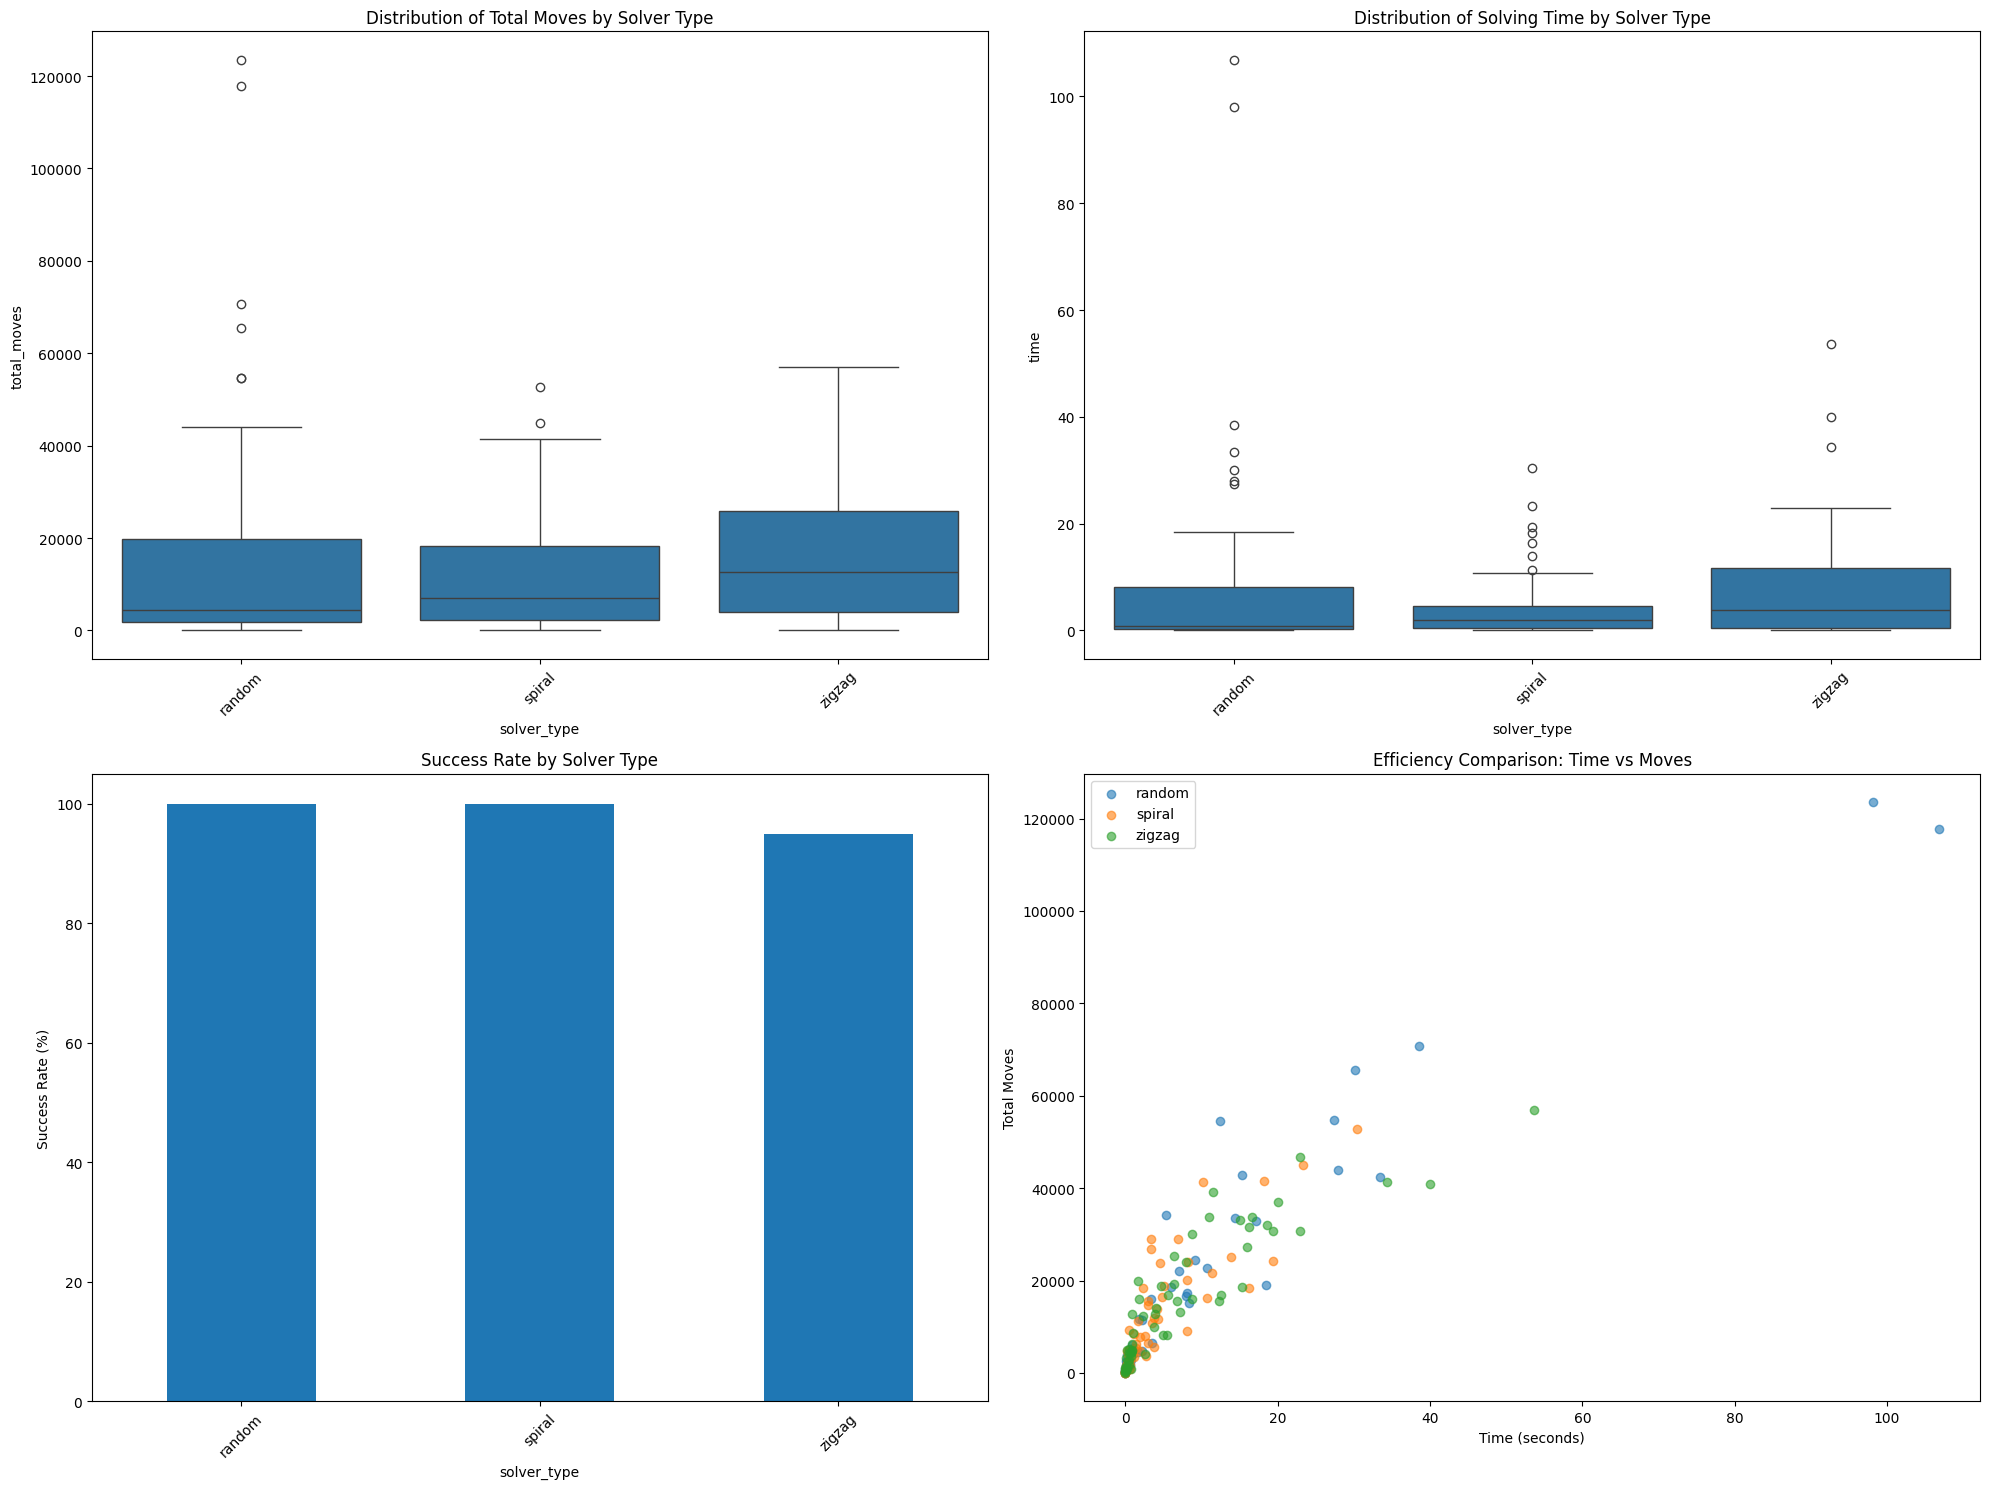

In [6]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# 1. Box plot for moves comparison
plt.subplot(2, 2, 1)
sns.boxplot(x='solver_type', y='total_moves', data=df)
plt.title('Distribution of Total Moves by Solver Type')
plt.xticks(rotation=45)

# 2. Box plot for time comparison
plt.subplot(2, 2, 2)
sns.boxplot(x='solver_type', y='time', data=df)
plt.title('Distribution of Solving Time by Solver Type')
plt.xticks(rotation=45)

# 3. Success rate by solver type
plt.subplot(2, 2, 3)
success_rate = df.groupby('solver_type')['finished'].mean() * 100
success_rate.plot(kind='bar')
plt.title('Success Rate by Solver Type')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)

# 4. Efficiency scatter plot (time vs moves)
plt.subplot(2, 2, 4)
for solver in df['solver_type'].unique():
    solver_data = df[df['solver_type'] == solver]
    plt.scatter(solver_data['time'], solver_data['total_moves'], 
                label=solver, alpha=0.6)
plt.xlabel('Time (seconds)')
plt.ylabel('Total Moves')
plt.title('Efficiency Comparison: Time vs Moves')
plt.legend()

plt.tight_layout()
plt.show()

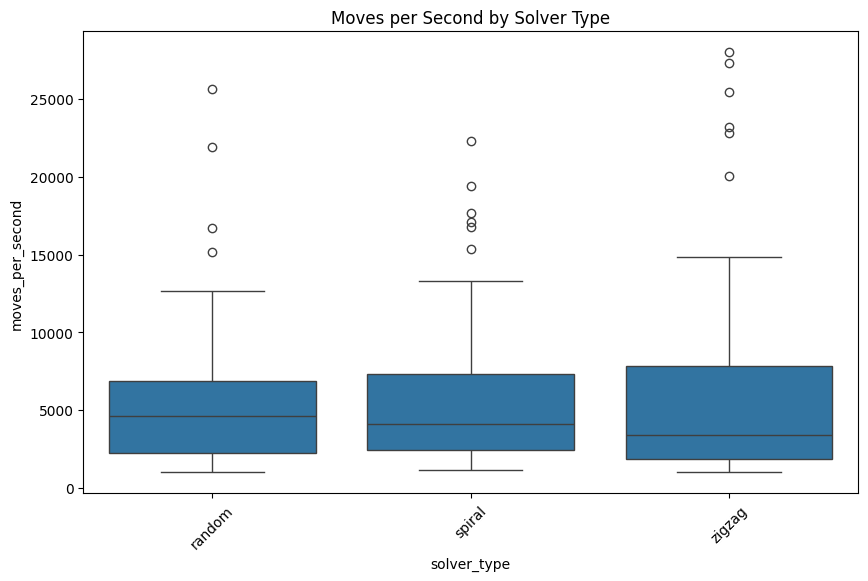

In [7]:
# Additional analysis: Move efficiency
df['moves_per_second'] = df['total_moves'] / df['time']
plt.figure(figsize=(10, 6))
sns.boxplot(x='solver_type', y='moves_per_second', data=df)
plt.title('Moves per Second by Solver Type')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Calculate and display key metrics
print("\n=== Key Performance Metrics ===")
for solver in df['solver_type'].unique():
    solver_data = df[df['solver_type'] == solver]
    print(f"\nSolver: {solver}")
    print(f"Average moves: {solver_data['total_moves'].mean():.2f}")
    print(f"Average time: {solver_data['time'].mean():.2f} seconds")
    print(f"Success rate: {solver_data['finished'].mean() * 100:.1f}%")
    print(f"Average moves per second: {solver_data['moves_per_second'].mean():.2f}")
    print(f"Average turns: {solver_data['turns'].mean():.2f}")


=== Key Performance Metrics ===

Solver: random
Average moves: 16731.02
Average time: 8.84 seconds
Success rate: 100.0%
Average moves per second: inf
Average turns: 2217.52

Solver: spiral
Average moves: 11719.73
Average time: 4.35 seconds
Success rate: 100.0%
Average moves per second: inf
Average turns: 185.67

Solver: zigzag
Average moves: 15565.72
Average time: 7.71 seconds
Success rate: 95.0%
Average moves per second: inf
Average turns: 123.90


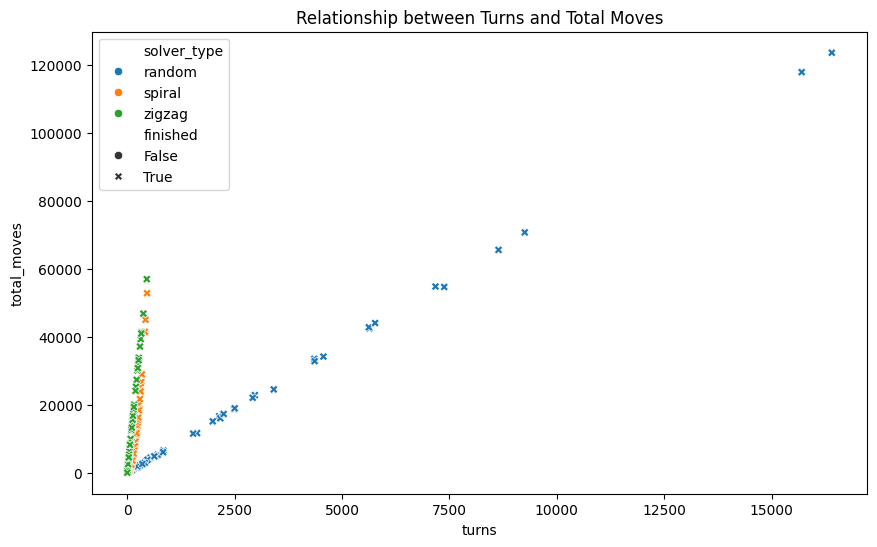

In [9]:
# Turn efficiency analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='turns', y='total_moves', hue='solver_type', style='finished')
plt.title('Relationship between Turns and Total Moves')
plt.show()

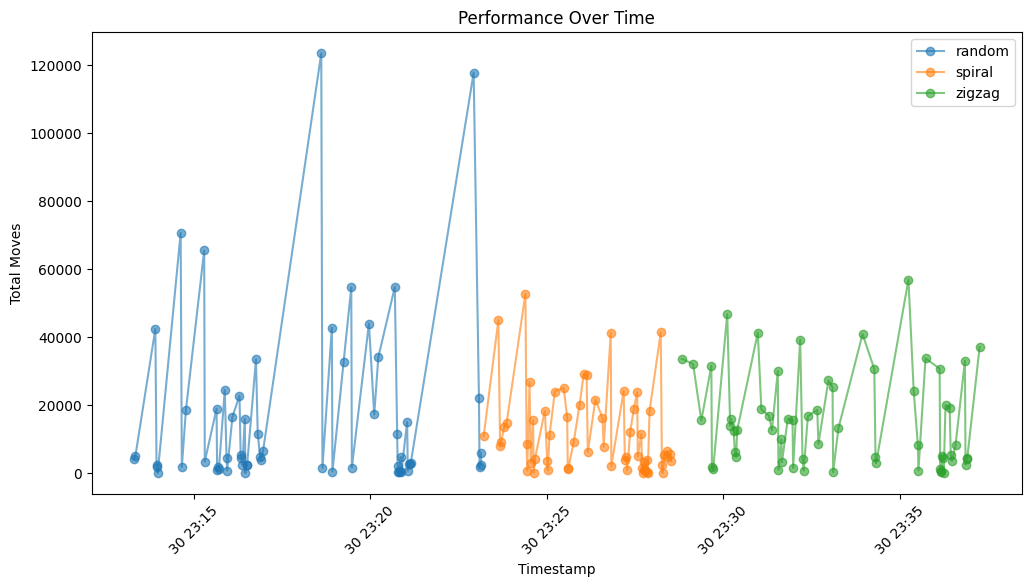

In [10]:
# Time series analysis
plt.figure(figsize=(12, 6))
for solver in df['solver_type'].unique():
    solver_data = df[df['solver_type'] == solver]
    plt.plot(solver_data['timestamp'], solver_data['total_moves'], 
             marker='o', label=solver, alpha=0.6)
plt.title('Performance Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Total Moves')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [11]:
# Correlation analysis
correlation_matrix = df.groupby('solver_type').apply(
    lambda x: x[['total_moves', 'time', 'turns']].corr()
)
print("\n=== Correlation Analysis ===")
print(correlation_matrix)


=== Correlation Analysis ===
                         total_moves      time     turns
solver_type                                             
random      total_moves     1.000000  0.943102  0.999915
            time            0.943102  1.000000  0.943233
            turns           0.999915  0.943233  1.000000
spiral      total_moves     1.000000  0.851093  0.958771
            time            0.851093  1.000000  0.786349
            turns           0.958771  0.786349  1.000000
zigzag      total_moves     1.000000  0.878969  0.999990
            time            0.878969  1.000000  0.878380
            turns           0.999990  0.878380  1.000000


C:\Users\gatz0\AppData\Local\Temp\ipykernel_40768\2134668380.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_matrix = df.groupby('solver_type').apply(
